In [84]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import numpy as np

In [85]:
data=pd.read_csv('Life-Expectancy-Data-Updated.csv')
data.head()
data_2015=data[data['Year']==2015]
data_2015.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [86]:
formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula=formula, data=data_2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.90e-21
Time:                        23:45:09   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

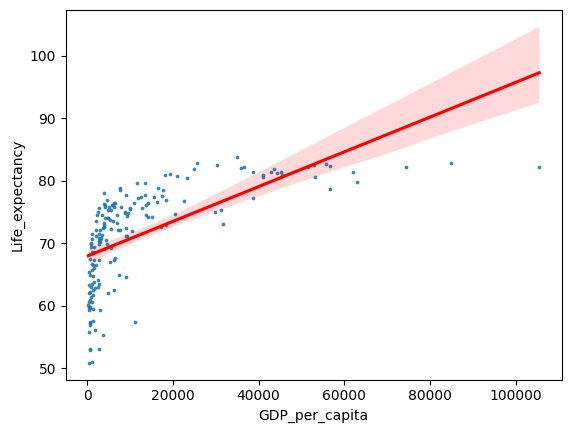

In [87]:
g = seaborn.regplot(data_2015, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 3}, line_kws={"color":"r"})

In [88]:
res.rsquared  #ked sa chceme pozriet vyhradne na r squared

0.3960851860371992

R squared pomocou scipy

In [89]:
slope, intercept,r_value,p_value,std_err=scipy.stats.linregress(data_2015['GDP_per_capita'],data_2015['Life_expectancy'])
r_value**2

0.3960851860371995

Na grafe vidíme, že pravdepodobne jednoduchá lineární regrese nemusí správne reflektovať dáta, hodila by sa log transformácia?. Rsquared je podľa scipy aj statsmodels summary 0.396

In [90]:
data_2015.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

Môžeme predpokladať, že so zvysujúcim sa GDP na hlavu sa bude zvyšovať priemerná dĺžka života. So zvyšujúcou sa priemernou dĺžkou štúdia sa bude tiež zvyšovať očakávaná dĺžka dožitia a to prostredníctvom viacerých faktorov, ako je napríklad z toho vyplývajúca vyššia mzda, potenciálne menší počet detí so z toho vyplývajúcim menším počtom pôrodov a rizík s tým spojených a ďalšie. So zvyšujúcim sa počtom nákaz HIV na osobu očakávame samozrejme zníženie očakávanej dĺžky dožitia. Čo sa týka premenných, ktoré sa zaoberajú percentom očkovania populácie proti jednotlivým chorobám tam očakávame so zvyšujúcim sa percentom zaočkovanosti zvýšenú priemernú dĺžku života. U BMI samotného ( v prípade že do modelu nevložíme kvadratické, alebo iné formy) by som očakávala kladné alebo záporné znamienko asi poďľa pomeru počtu štátov, ktoré sú buď postihnuté skôr podváhou/hladom (kladné znamienko) alebo väčším počtom štátov, ktoré sú postihnuté skôr nadváhou (záporné znamienko)

In [91]:
formula2 = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod2 = smf.ols(formula=formula2, data=data_2015)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.22e-54
Time:                        23:45:09   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Z vyššie uvedených omnibus testu a Jarque-Bera testu o normalite reziduí vyplýva, že nemôžeme zamietnuť nulovú hypotézu o normalite reziduí na 5% hladine významnosti. (u oboch testov je nulovou hypotézou normalita). Pravdodobnosť chyby I. druhu je u Omnibus testu 14.3% a u Jarque-Bera testu 13,8%. 

Koeficient determinace výsledného modelu je 0,790. Zmenil sa z pôvodného modelu, kde mal hodnotu 0.396. Znamená to, že nový model vysvetľuje 79% variability v pozorovaniach, kdežto pôvodný model vysvetlil iba necelých 40%. Keďže Rquared sa pridaním nových premenných automaticky zvyšuje už len ich samotným pridanám Adjusted Rsquared penalizuje model za pridanie nových premenných.Porovnaním AdjRsquared u oboch modelov môžeme pozorovať skutočné zlepšenie vysvetľujúcich vlastností modelu z 0.393 na 0.782.

Koeficient pre zaočkovanosť proti záškrtu má nájväčšiu phodnotu, ďalší model bude bez tejto premennej

In [92]:
rezidua_2=res2.resid
scipy.stats.normaltest(rezidua_2)


NormaltestResult(statistic=3.8942998669947437, pvalue=0.14268014053902375)

<Axes: >

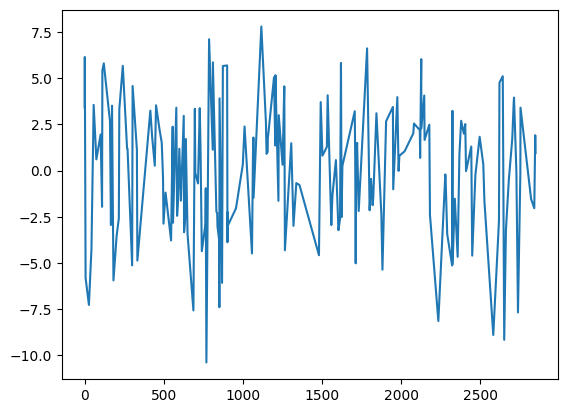

In [93]:
rezidua_2.plot()

Aj na základe vyššie uvedeného testu pomocou modulu scipy sme došli k záveru, že nemôžeme zamietnuť nulovú hypotézu o normalite reziduí.

In [94]:
formula3 = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles"
mod3 = smf.ols(formula=formula3, data=data_2015)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.12e-55
Time:                        23:45:09   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mierne sa zvýšilo AdjRSquared na 0.783 (na 3. desatinnom čísle), dá sa povedať, že tento model o málinko lepšie popisuje vzťah medzi exogénnymi a endogénnou premennou.

Hodnota ostatných koeficientov u jednotlivých premenných sa tiež významne nezmenila (zmenili sa iba na 3. desatinnom čísle).